In [1]:
import pandas as pd
import numpy as np
from scipy import spatial
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import fiona
import statistics
import contextily as cx

In [2]:
mypath = '/home/selihadji/Documenti/papers/Platoon_II/trips/'

In [3]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [4]:
def filterSubstr(lists, substr):
    return [x for x in lists if substr in x]

searchString = '2022_09_15'
onlyfiles_15_09 = filterSubstr(onlyfiles, searchString)
onlyfiles_15_09

searchString1 = '9_2'
onlyfiles = filterSubstr(onlyfiles_15_09, searchString1)
onlyfiles

#searchString2 = '08_41'
#onlyfiles2 = filterSubstr(onlyfiles_15_09, searchString2)
#onlyfiles = onlyfiles1 + onlyfiles2
#onlyfiles

['2022_09_15_PS Skylark Test_09_21_09_47_9ecd818c-5d89-4c10-9f8c-5f0d69e19df4.csv',
 '2022_09_15_RG Logi Jeep_09_23_09_47_263126ed-769e-432e-8200-6c02a5b0f51a.csv',
 '2022_09_15_RW2 Logi Jeep_09_24_09_45_63b10130-58f0-4998-be91-9ce817689a00.csv']

In [5]:
allfiles = []
for i in range(len(onlyfiles)):
    df = pd.read_csv(mypath + str(onlyfiles[i]), sep=';', decimal=',')
    df['Time[ms]'] = pd.to_datetime(df['Time[ms]'], unit='ms')
    df['driver'] = str(onlyfiles[i])[11:13]
    coord_ = [Point(x, y) for x, y in zip(df.Longitude, df.Latitude)]
    alldata_ = gpd.GeoDataFrame(df, geometry=coord_, crs ="EPSG:4326")
    allfiles.append(df)
alldata = pd.concat(allfiles, axis=0).reset_index(drop=True)

In [6]:
alldata['data'] = alldata['Time[ms]'].dt.date

In [7]:
alldata["data"] = pd.to_datetime(alldata["data"])

In [8]:
alldata_RW = alldata[alldata.driver == 'RW']
alldata_PS = alldata[alldata.driver == 'PS']
alldata_RG = alldata[alldata.driver == 'RG']

In [9]:
allfiles = []
for i in range(len(onlyfiles)):
    df = pd.read_csv(mypath + str(onlyfiles[i]), sep=';', decimal=',')
    df['Time[ms]'] = pd.to_datetime(df['Time[ms]'], unit='ms')
    df['driver'] = str(onlyfiles[i])[11:13]
    coord_ = [Point(x, y) for x, y in zip(df.Longitude, df.Latitude)]
    alldata_ = gpd.GeoDataFrame(df, geometry=coord_, crs ="EPSG:4326")
    allfiles.append(df)

In [10]:
alldata = pd.concat(allfiles, axis=0).reset_index(drop=True)

In [11]:
alldata.driver.unique()

array(['PS', 'RG', 'RW'], dtype=object)

In [12]:
alldata_SORTED = alldata.sort_values(by = 'Time[ms]').reset_index(drop=True)

In [13]:
alldata_SORTED.head(100)

,Time[ms],Latitude,Longitude,Speed[m/s],Distance,Altitude[m],Flag,Acceleration[m/s^2],AccWork[J],AeroWork[J],...,TotalWork[J],StandStillTime[s],Fuel[l],CO2[kg],AccECE[%],AeroECE[%],STSECE[%],WorkECE[%],driver,geometry
0,2022-09-15 09:21:38.700,53.556025,9.972544,0.013889,NaN,25.63,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PS,POINT (9.97254 53.55602)
1,2022-09-15 09:21:39.700,53.556025,9.972545,0.016667,0.016667,25.63,0,0.002778,0.0,0.0,...,375.0,1.0,0.000042,0.000112,1.521321,0.000304,210.990530,1.298957,PS,POINT (9.97254 53.55602)
2,2022-09-15 09:21:40.700,53.556024,9.972545,0.008333,0.008333,25.64,4,-0.008333,-1.0,0.0,...,372.0,1.0,0.000042,0.000111,1.014214,0.000228,210.990530,2.571551,PS,POINT (9.97255 53.55602)
3,2022-09-15 09:21:41.700,53.556024,9.972546,0.022222,0.022222,25.65,4,0.013889,0.0,0.0,...,376.0,1.0,0.000042,0.000112,3.221620,0.000376,210.990530,3.841820,PS,POINT (9.97255 53.55602)
4,2022-09-15 09:21:42.700,53.556023,9.972546,0.005556,0.005556,25.66,4,-0.016667,-1.0,0.0,...,372.0,1.0,0.000042,0.000111,2.882502,0.000340,210.990530,5.083608,PS,POINT (9.97255 53.55602)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-09-15 09:23:20.000,53.556005,9.972562,0.008333,0.008333,22.88,0,0.002778,0.0,0.0,...,373.0,1.0,0.000042,0.000111,2.312557,0.000290,210.987171,80.742895,PS,POINT (9.97256 53.55601)
96,2022-09-15 09:23:21.000,53.556005,9.972562,0.022222,0.022222,22.89,4,0.013889,0.0,0.0,...,376.0,1.0,0.000042,0.000112,2.374689,0.000294,210.987204,81.229234,PS,POINT (9.97256 53.55601)
97,2022-09-15 09:23:22.000,53.556005,9.972562,0.002778,0.002778,22.89,0,-0.019444,-1.0,0.0,...,372.0,1.0,0.000042,0.000111,2.369265,0.000294,210.987236,81.713731,PS,POINT (9.97256 53.55601)
98,2022-09-15 09:23:23.000,53.556005,9.972562,0.013889,0.013889,22.89,0,0.011111,0.0,0.0,...,374.0,1.0,0.000042,0.000112,2.387488,0.000293,210.987268,82.193640,PS,POINT (9.97256 53.55601)


In [14]:
alldata_SORTED_cut = alldata_SORTED.dropna().reset_index(drop=True)

In [15]:
alldata_SORTED_cut['Time'] = pd.to_datetime(alldata_SORTED_cut['Time[ms]'].dt.strftime('%H:%M:%S'))

In [16]:
rw = alldata_SORTED_cut[alldata_SORTED_cut.driver == 'RW'].reset_index(drop=True).drop_duplicates()
rg = alldata_SORTED_cut[alldata_SORTED_cut.driver == 'RG'].reset_index(drop=True).drop_duplicates()
ps = alldata_SORTED_cut[alldata_SORTED_cut.driver == 'PS'].reset_index(drop=True).drop_duplicates()

In [17]:
from haversine import haversine, Unit
import haversine as hs

In [18]:
platoon_alldist = []
platoon_all_CO2 = []

platoon_all_lat_dist = []
platoon_all_lon_dist = []

platoon_all_lat_CO2 = []
platoon_all_lon_CO2 = []

#rw
#rg
#ps


for i in range(len(rw)):
    platoon_lat_dist = []
    platoon_lon_dist = []
    platoon_lat_CO2 = []
    platoon_lon_CO2 = []
    platoon_dist = []
    CO2_max = []
    dist_mat = []
    
    rw_ = rw.iloc[i]
    
    df_array1 = (rw_.Latitude, rw_.Longitude)

    rg_ = rg[rg['Time'] > rw_['Time']].reset_index(drop=True)
    df_array2 = list(zip(rg_.Latitude, rg_.Longitude))[0:60]
        
    for j in range(len(df_array2)):
        dist_mat.append(hs.haversine(df_array1,df_array2[j],unit=Unit.METERS))

    rg_mindist = min(dist_mat)
    rg_mindist_index = dist_mat.index(rg_mindist)

    platoon_dist.append(rg_mindist)

    platoon_lat_dist.append(rg_.iloc[rg_mindist_index]["Latitude"])
    platoon_lon_dist.append(rg_.iloc[rg_mindist_index]["Longitude"])

    CO2 = []
    CO2.append(rg_.iloc[0]['CO2[kg]'])
    try:
        CO2.extend(list(rg_.iloc[1:21]['CO2[kg]']))
    except:
        pass
    
    rg_maxCO2 = max(CO2)
    rg_maxCO2_index = CO2.index(rg_maxCO2)
    CO2_max.append(rg_.reset_index(drop=True).iloc[rg_maxCO2_index]['CO2[kg]'])
    platoon_lat_CO2.append(rg_.reset_index(drop=True).iloc[rg_maxCO2_index]["Latitude"])
    platoon_lon_CO2.append(rg_.reset_index(drop=True).iloc[rg_maxCO2_index]["Longitude"])    


    ps_ = ps[ps['Time'] > rg_['Time'][rg_mindist_index]].reset_index(drop=True)
    df_array3 = list(zip(ps_.Latitude, ps_.Longitude))[0:60]        
    
    dist_mat = []

    for j in range(len(df_array3)):
        dist_mat.append(hs.haversine(df_array2[rg_mindist_index],df_array3[j],unit=Unit.METERS))

    ps_mindist = min(dist_mat)
    ps_mindist_index = dist_mat.index(ps_mindist)

    platoon_dist.append(ps_mindist)
    platoon_lat_dist.append(ps_.reset_index(drop=True).iloc[ps_mindist_index]["Latitude"])
    platoon_lon_dist.append(ps_.reset_index(drop=True).iloc[ps_mindist_index]["Longitude"])    

    CO2 = []

    CO2.append(ps_.iloc[0]['CO2[kg]'])
    try:
        CO2.extend(list(ps_.iloc[1:21]['CO2[kg]']))
    except:
        pass
    ps_maxCO2 = max(CO2)
    ps_maxCO2_index = CO2.index(ps_maxCO2)
    CO2_max.append(ps_.reset_index(drop=True).iloc[ps_maxCO2_index]['CO2[kg]'])
    platoon_lat_CO2.append(ps_.reset_index(drop=True).iloc[ps_maxCO2_index]["Latitude"])
    platoon_lon_CO2.append(ps_.reset_index(drop=True).iloc[ps_maxCO2_index]["Longitude"])  

      
    platoon_all_lat_dist.append(platoon_lat_dist)
    platoon_all_lon_dist.append(platoon_lon_dist)
    platoon_all_lat_CO2.append(platoon_lat_CO2)
    platoon_all_lon_CO2.append(platoon_lon_CO2)
    platoon_alldist.append(platoon_dist)
    platoon_all_CO2.append(CO2_max)

<Axes: >

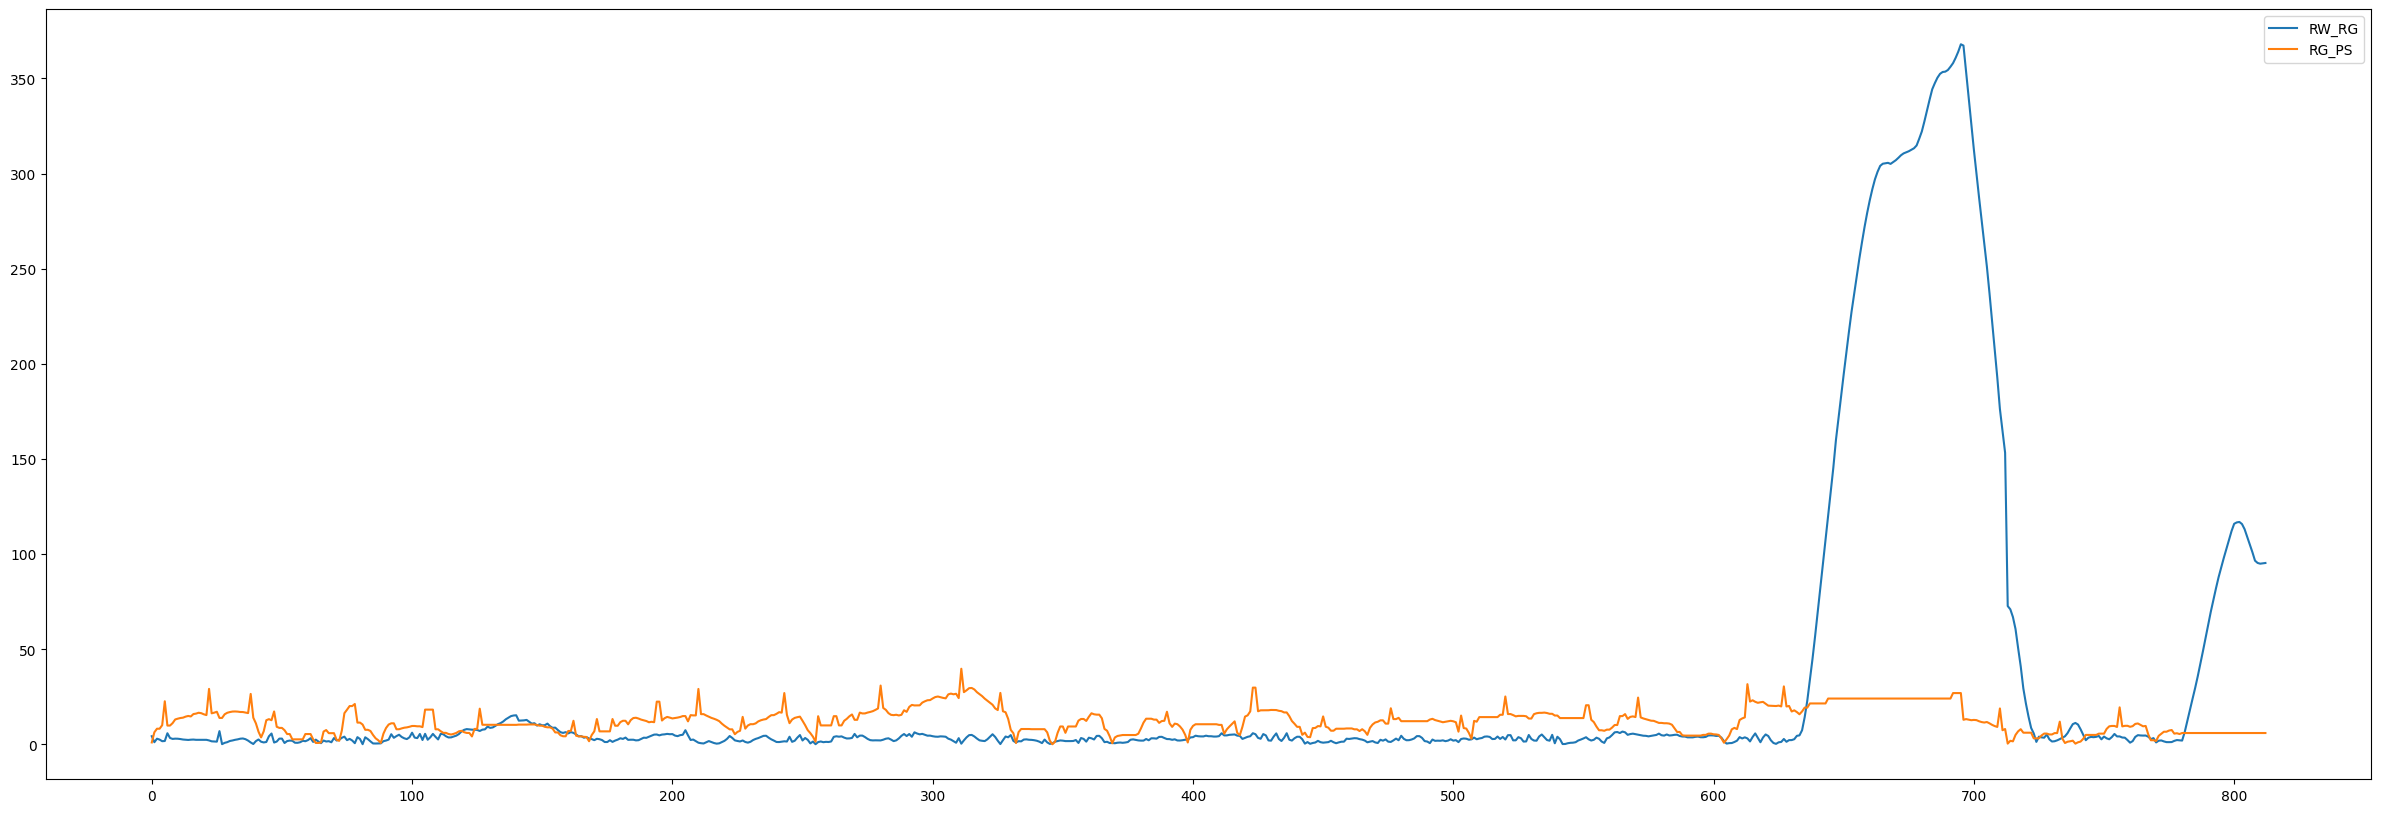

In [19]:
pd.DataFrame(platoon_alldist, columns = ['RW_RG', 'RG_PS']).plot(figsize=(30,10))

In [20]:
dist_v = pd.DataFrame(platoon_alldist, columns = ['RW_RG', 'RG_PS'])
pd.DataFrame(platoon_alldist, columns = ['RW_RG', 'RG_PS']).to_csv('distance_platoon.csv', index=False)

In [21]:
dist_coord = pd.concat([pd.DataFrame(platoon_all_lat_dist, columns=['v1_lat', 'v2_lat'])['v1_lat'], pd.DataFrame(platoon_all_lon_dist, columns=['v1_lon', 'v2_lon'])['v1_lon'],pd.DataFrame(platoon_all_lat_dist, columns=['v1_lat', 'v2_lat'])['v2_lat'], pd.DataFrame(platoon_all_lon_dist, columns=['v1_lon', 'v2_lon'])['v2_lon']], axis=1)

In [22]:
pd.concat([pd.DataFrame(platoon_all_lat_dist, columns=['v1_lat', 'v2_lat'])['v1_lat'], pd.DataFrame(platoon_all_lon_dist, columns=['v1_lon', 'v2_lon'])['v1_lon'],pd.DataFrame(platoon_all_lat_dist, columns=['v1_lat', 'v2_lat'])['v2_lat'], pd.DataFrame(platoon_all_lon_dist, columns=['v1_lon', 'v2_lon'])['v2_lon']], axis=1).to_csv('platoon_distances_coord.csv', index=False)

In [23]:
infr = pd.read_csv('/home/selihadji/Documenti/papers/Platoon_II/infrast_data_update_.csv', sep=';')
infr.what.unique()

array(['Turn_left', '4-ways intersection', 'Traffic_light', 'Curve',
       'Road_immission', 'Turn_right'], dtype=object)

In [24]:
allveic = []
for k in range(0, len(dist_coord.columns)-1, 2):
    veic = []
    for i in range(len(dist_coord)):
        infra = []
        for j in range(len(infr)):
            inf = (infr.iloc[j].lon,infr.iloc[j].lat)
            distcoor = (dist_coord.iloc[i][str(dist_coord.columns[k+1])], dist_coord.iloc[i][str(dist_coord.columns[k])])
            infra.append(hs.haversine(inf,distcoor,unit=Unit.METERS))
        veic.append(infra)
    allveic.append(veic)

In [25]:
v1 = pd.DataFrame(allveic[0])
v2 = pd.DataFrame(allveic[1])

In [26]:
allfeat = []
for i in range(len(v1)): 
    allfeat.append(list(v1[v1<500].iloc[i].dropna()))
new_v1 = pd.DataFrame(allfeat).iloc[:,0:7].fillna(0)

In [27]:
allfeat = []
for i in range(len(v2)): 
    allfeat.append(list(v2[v2<500].iloc[i].dropna()))
new_v2 = pd.DataFrame(allfeat).iloc[:,0:7].fillna(0)

In [28]:
v1.columns = infr.what
v2.columns = infr.what

In [29]:
vlist = []
vlist.append(v1)
vlist.append(v2)

In [30]:
import statsmodels.api as sm

In [31]:
all_X = []
all_y = []

for k in range(len(vlist)):
    feats = []
    v = vlist[k]
    infrast = v.idxmin(axis=1)
    for i in range(len(v)):
        if (v.iloc[i][str(infrast[i])] < 80).any():
            feats.append([infrast[i]])
        else:
            feats.append([])
    new_v = pd.get_dummies(pd.DataFrame(feats), prefix='Feat')

    X = new_v.copy()
    y = dist_v[str(dist_v.columns[k])]
    X['old_dist'] = dist_v[str(dist_v.columns[k])].shift(10).fillna(0)
    all_X.append(X)
    all_y.append(y)

all_X_ = pd.concat(all_X).reset_index(drop=True).fillna(0)
all_y_ = pd.concat(all_y).reset_index(drop=True).fillna(0)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  RG_PS   R-squared (uncentered):                   0.821
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                              529.6
Date:                Tue, 01 Aug 2023   Prob (F-statistic):                   1.95e-296
Time:                        09:38:11   Log-Likelihood:                         -2600.6
No. Observations:                 813   AIC:                                      5215.
Df Residuals:                     806   BIC:                                      5248.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Feat_4-ways intersection     5.2009      0.922      5.641      0.000       3.391       7.011
Feat_Curve                   7.1994      1.797      4.005      0.000       3.671      10.727
Feat_Road_immission          3.5020      1.198      2.923      0.004       1.151       5.853
Feat_Traffic_light           1.3405      0.429      3.128      0.002       0.499       2.182
Feat_Turn_left               8.8701      1.750      5.069      0.000       5.435      12.305
Feat_Turn_right              2.6193      0.849      3.085      0.002       0.953       4.286
old_dist                     0.7919      0.023     34.579      0.000       0.747       0.837
==============================================================================
Omnibus:                       44.198   Durbin-Watson:                   0.463
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.180
Skew:                           0.286   Prob(JB):                     1.45e-23
Kurtosis:                       4.667   Cond. No.                         121.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
results_summary = model.summary()
df = pd.DataFrame.from_records(results_summary.tables[1].data)
header = df.iloc[0]
df = df[1:] # take the data less the header row
df.columns = header
df.to_csv('platoon_II_15_09_09_24.csv')

In [33]:
platoon_all_CO2_ = pd.DataFrame(platoon_all_CO2, columns = ['RG_LA', 'LA_PS'])
pd.DataFrame(platoon_all_CO2, columns = ['RW_LA', 'LA_PS']).to_csv('CO2_platoon.csv', index=False)

all_X = []
all_y = []

for k in range(len(vlist)):
    feats = []
    v = vlist[k]
    infrast = v.idxmin(axis=1)
    for i in range(len(v)):
        if (v.iloc[i][str(infrast[i])] <80).any():
            feats.append([infrast[i]])
        else:
            feats.append([])
    new_v = pd.get_dummies(pd.DataFrame(feats), prefix='Feat')

    X = new_v.copy()
    y = platoon_all_CO2_[str(platoon_all_CO2_.columns[k])]
    X['old_dist'] = dist_v[str(dist_v.columns[k])].shift(10).fillna(0)
    all_X.append(X)
    all_y.append(y)

all_X_ = pd.concat(all_X).reset_index(drop=True).fillna(0)
all_y_ = pd.concat(all_y).reset_index(drop=True).fillna(0)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  LA_PS   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.705
Method:                 Least Squares   F-statistic:                              279.0
Date:                Tue, 01 Aug 2023   Prob (F-statistic):                   1.72e-210
Time:                        09:38:12   Log-Likelihood:                          3637.2
No. Observations:                 813   AIC:                                     -7260.
Df Residuals:                     806   BIC:                                     -7228.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Feat_4-ways intersection     0.0068      0.000     15.796      0.000       0.006       0.008
Feat_Curve                   0.0041      0.001      4.901      0.000       0.002       0.006
Feat_Road_immission          0.0023      0.001      4.123      0.000       0.001       0.003
Feat_Traffic_light           0.0025      0.000     12.349      0.000       0.002       0.003
Feat_Turn_left               0.0037      0.001      4.598      0.000       0.002       0.005
Feat_Turn_right              0.0029      0.000      7.424      0.000       0.002       0.004
old_dist                     0.0001   1.07e-05     12.957      0.000       0.000       0.000
==============================================================================
Omnibus:                       28.163   Durbin-Watson:                   0.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.567
Skew:                           0.354   Prob(JB):                     1.15e-08
Kurtosis:                       3.761   Cond. No.                         121.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
results_summary = model.summary()
df = pd.DataFrame.from_records(results_summary.tables[1].data)
header = df.iloc[0]
df = df[1:] # take the data less the header row
df.columns = header
df.to_csv('platoon_II_15_09_09_24_CO2.csv')